### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import math
import datetime
import plotly.express as px

### Data Loading & Initial Processing

In [ ]:
# Read in .tsv files
contacts = pd.read_csv('/work/contacts.tsv', sep='\t')
searches = pd.read_csv('/work/searches.tsv', sep='\t')

# Converting date strings to datetime objects
contacts['ds_checkin'] = pd.to_datetime(contacts['ds_checkin'])
contacts['ds_checkout'] = pd.to_datetime(contacts['ds_checkout'])
contacts['ts_contact_at'] = pd.to_datetime(contacts['ts_contact_at'])
contacts['ts_reply_at'] = pd.to_datetime(contacts['ts_reply_at'])
contacts['ts_accepted_at'] = pd.to_datetime(contacts['ts_accepted_at'])
contacts['ts_booking_at'] = pd.to_datetime(contacts['ts_booking_at'])
searches['ds_checkin'] = pd.to_datetime(searches['ds_checkin'])
searches['ds_checkout'] = pd.to_datetime(searches['ds_checkout'])
searches['ds'] = pd.to_datetime(searches['ds'])

### Data Cleaning

In [ ]:
# Clean up searches data by dropping unnecessary columns and rows with missing dates
searches = searches.drop(columns='filter_neighborhoods')
searches = searches.dropna(subset=['ds', 'ds_checkin'])

### Feature Engineering

In [ ]:
# Calculating stay length for contacts and searches
contacts['ds_length'] = (contacts['ds_checkout'] - contacts['ds_checkin']).dt.days
searches['ds_length'] = (searches['ds_checkout'] - searches['ds_checkin']).dt.days

# Calculating days a boooking was searched for in advance
searches['advance_search_days'] = (searches['ds_checkin'] - searches['ds']).dt.days

### Data Inspection

In [ ]:
print("First few rows of the Searches DataFrame:")
display(searches.head())

First few rows of the Searches DataFrame:


,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,ds_length,advance_search_days
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,67.0,",Entire home/apt,Entire home/apt,Private room,...",3,8
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,67.0,NaN,10,8
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt",2,38
5,2014-10-01,004e88da-930b-4209-886f-b58f90fdc67e,2014-10-03,2014-10-05,7,2.0,5,5,SE,NaN,NaN,NaN,2,2
6,2014-10-01,00623353-97d2-43c9-ac02-1adfecf1aca6,2014-11-01,2014-11-09,6,8.0,1,1,IE,NaN,NaN,"Entire home/apt,Entire home/apt,Private room,P...",8,31


In [ ]:
print("First few rows of the Contacts DataFrame:")
display(contacts.head())

First few rows of the Contacts DataFrame:


,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages,ds_length
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-13,2014-10-15,2,13,2
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03,2014-11-04 09:45:50,2014-11-04 09:45:50,2014-11-04 12:20:46,2014-11-27,2014-11-30,1,10,3
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50,2014-10-10 15:07:01,NaT,NaT,2014-10-17,2014-10-19,2,3,2
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53,NaT,NaT,NaT,2014-10-17,2014-10-19,2,2,2
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,ac162061-55e2-4072-ac91-2e080f9581f2,ec68e0af-b0f2-42c7-b6f8-d41061c083ff,2014-10-10 15:22:26,2014-10-10 15:24:26,2014-10-10 15:24:26,2014-10-10 15:52:42,2014-10-17,2014-10-19,2,14,2


### Unique ID Analysis

Analyzes the uniqueness of user IDs and listing IDs in both the searches and contacts datasets.

In [ ]:
# Print the number of unique user IDs in searches
print('Unique id_users in searches:', len(searches.id_user.unique()))
# Print the number of unique guest IDs in contacts
print('Unique id_users in contacts:', len(contacts.id_guest.unique()))
# Print the number of unique listing IDs in contacts
print('Unique id_listings in contacts:', len(contacts.id_listing.unique()))

Unique id_users in searches: 14207
Unique id_users in contacts: 3283
Unique id_listings in contacts: 1542


### Inquiry Date Distributions: Check-in vs. Check-out

Comparing the distribution of inquiry dates for check-ins and check-outs.

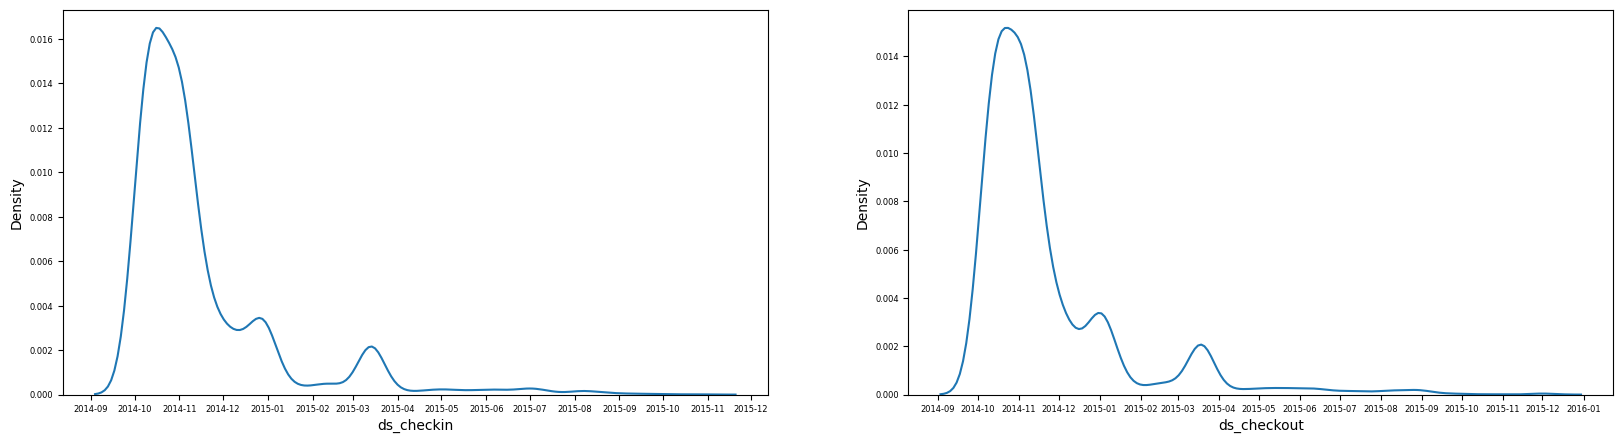

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Plot kernel density estimation for check-in dates
sns.kdeplot(contacts['ds_checkin'], ax=ax[0])
ax[0].xaxis.set_major_locator(mdates.MonthLocator()) # Month intervals for x-axis
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # Format x-axis (Year-Month)
ax[0].tick_params(labelsize=6)

# Plot kernel density estimation for check-out dates
sns.kdeplot(contacts['ds_checkout'], ax=ax[1])
ax[1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[1].tick_params(labelsize=6)

plt.show()

### Distribution for Length of Time Booked

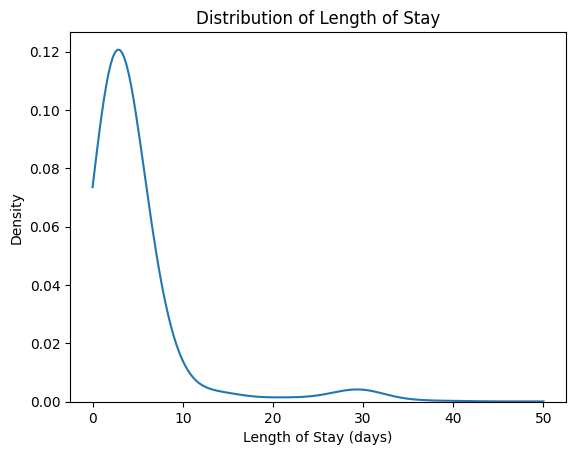

In [ ]:
# KDE plot for the distribution of the length of time booked
sns.kdeplot(contacts['ds_length'], clip=(0, 50))
plt.xlabel('Length of Stay (days)')  # Add an x-axis label
plt.ylabel('Density')  # Add a y-axis label
plt.title('Distribution of Length of Stay')  # Add a title to the plot

plt.show()

### Length of Time Booked vs. Number of Guests

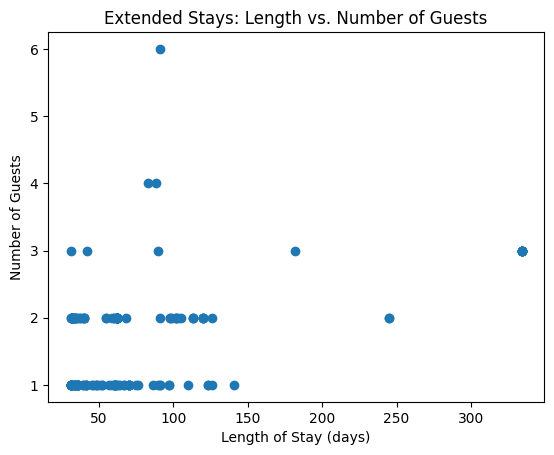

In [ ]:
# Filter contacts for extended stays and plot against the number of guests
filtered_contacts = contacts[contacts['ds_length'] > 30]
plt.scatter(filtered_contacts['ds_length'], filtered_contacts['n_guests'])
plt.xlabel('Length of Stay (days)')
plt.ylabel('Number of Guests')
plt.title('Extended Stays: Length vs. Number of Guests')
plt.show()

### Calculate and Add Reply Time and Acceptance Time to Contacts Data Frame

In [ ]:
# Calculate reply time and acceptance time in hours
contacts['reply_time'] = np.round((contacts['ts_reply_at'] - contacts['ts_contact_at']).dt.total_seconds() / (24*60*60), 2)
contacts['acceptance_time'] = np.round((contacts['ts_accepted_at'] - contacts['ts_contact_at']).dt.total_seconds() / (24*60*60), 2)

# Display the new columns for review
display(contacts[['reply_time', 'acceptance_time']].head())

,reply_time,acceptance_time
0,0.00,0.00
1,0.02,0.02
2,0.13,NaN
3,NaN,NaN
4,0.00,0.00


### Date of Inquiry Distribution

This section explores the distribution of inquiry dates to understand the frequency of contacts over time. The KDE plot visualizes the density of inquiries across different dates, highlighting peak periods of customer engagement.

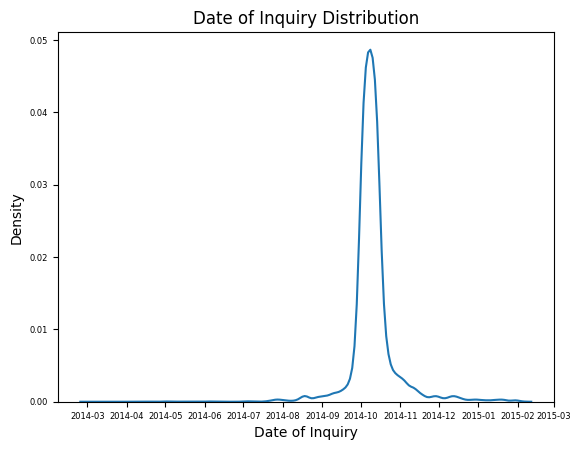

In [ ]:
sns.kdeplot(contacts['ts_contact_at'])

# Set the major locator to months and format the dates on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.gca().tick_params(labelsize=6)

# Adding labels and title for better context understanding
plt.xlabel('Date of Inquiry')
plt.ylabel('Density')
plt.title('Date of Inquiry Distribution')

plt.show()


### Distribution of Search Length and Advance Search Days

In this section, two distributions are plotted: the first shows the average length of stay for searches, and the second illustrates how far in advance of the check-in date these searches are made.

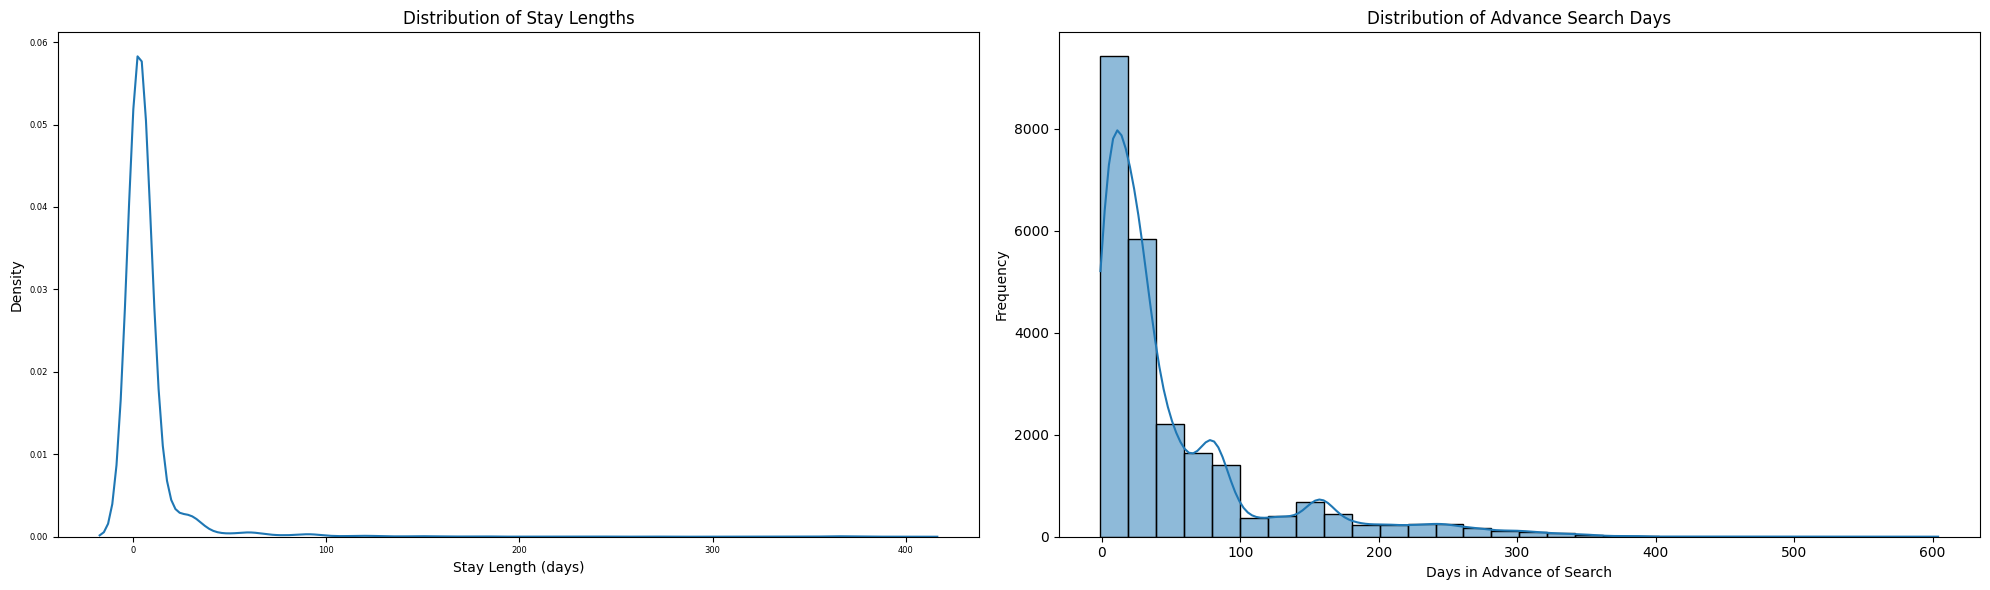

Average number of days a booking was searched for in advance: 51.34
Average stay length searched for: 7.67


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Plotting distribution of search dates
sns.kdeplot(searches['ds_length'], ax=ax[0], bw_adjust=2)
ax[0].set_xlabel('Stay Length (days)')
ax[0].set_ylabel('Density')
ax[0].set_title('Distribution of Stay Lengths')
ax[0].tick_params(labelsize=6)

# Plotting distribution of days booked in advance
sns.histplot(searches['advance_search_days'], ax=ax[1], bins=30, kde=True)
ax[1].set_title('Distribution of Advance Search Days')
ax[1].set_xlabel('Days in Advance of Search')
ax[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

# Calculate & Display averages about the booking searches
average_days_in_advance = searches['advance_search_days'].mean()
average_stay_length = searches['ds_length'].mean()
print(f"Average number of days a booking was searched for in advance: {average_days_in_advance:.2f}")
print(f"Average stay length searched for: {average_stay_length:.2f}")


### Observed Patterns for Successful Booking Inquiries

In [ ]:
contacts['is_booked'] = contacts['ts_booking_at'].notna()

# Count the total number of inquiries (before any filtering or grouping)
number_of_rows_before = len(contacts)
print(f"Total number of inquiries: {number_of_rows_before}")

# Filter the DataFrame to only include booked inquiries
booked_inquiries = contacts[contacts['is_booked']]

# Count the total number of inquiries that led to bookings
total_inquiries_leading_to_bookings = len(booked_inquiries)
print(f"Inquiries that led to bookings: {total_inquiries_leading_to_bookings}")

not_booked_inquiries = contacts[~contacts['is_booked']]

Total number of inquiries: 7823
Inquiries that led to bookings: 2174


### 1. Guest Distribution in Successful vs. Unsuccessful Booking Inquiries

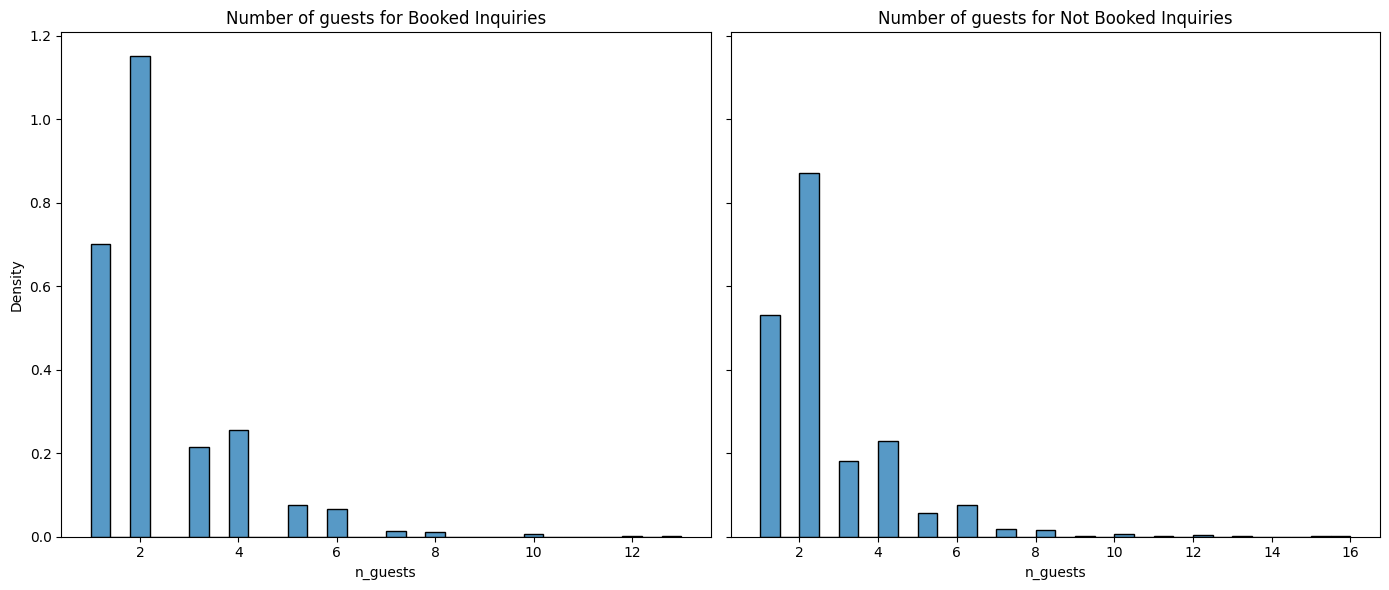

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(data=booked_inquiries, x='n_guests', bins=30, ax=ax[0], kde=False, stat="density")
ax[0].set_title('Number of guests for Booked Inquiries')

sns.histplot(data=not_booked_inquiries, x='n_guests', bins=30, ax=ax[1], kde=False, stat="density")
ax[1].set_title('Number of guests for Not Booked Inquiries')

plt.tight_layout()
plt.show()

### 2. Message Distribution in Successful vs. Unsuccessful Booking Inquiries

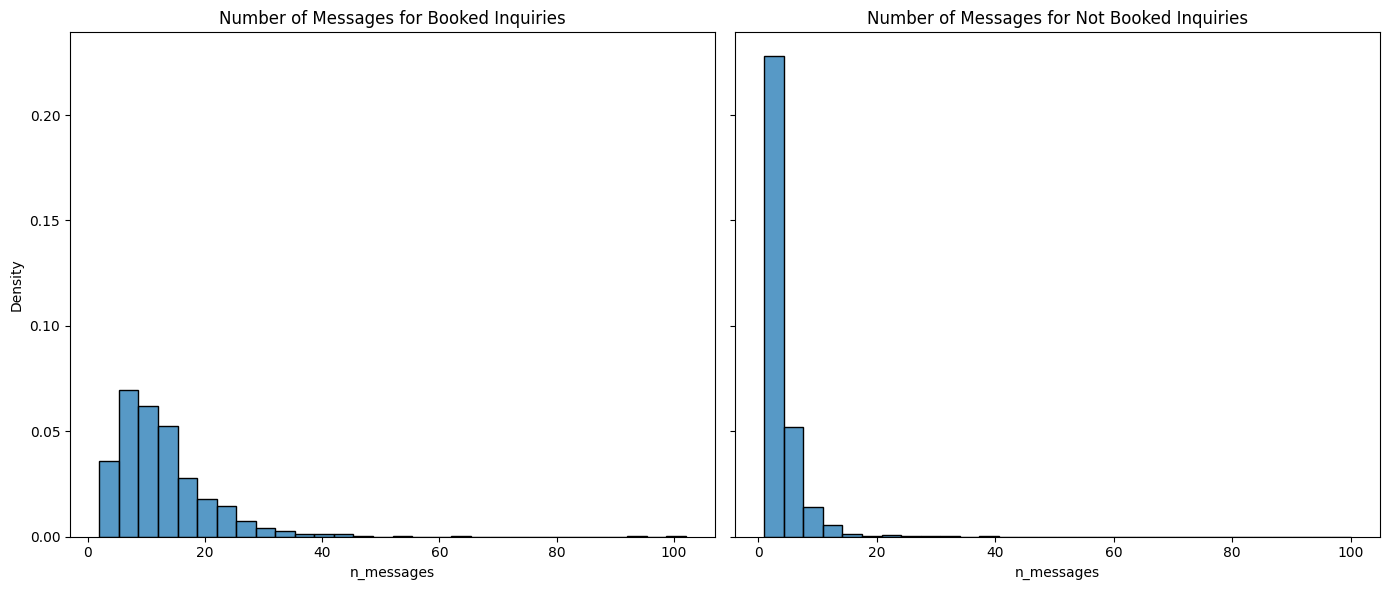

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(data=booked_inquiries, x='n_messages', bins=30, ax=ax[0], kde=False, stat="density")
ax[0].set_title('Number of Messages for Booked Inquiries')

sns.histplot(data=not_booked_inquiries, x='n_messages', bins=30, ax=ax[1], kde=False, stat="density")
ax[1].set_title('Number of Messages for Not Booked Inquiries')

plt.tight_layout()
plt.show()

### 3. Reply Time Distribution in Successful vs. Unsuccessful Booking Inquiries

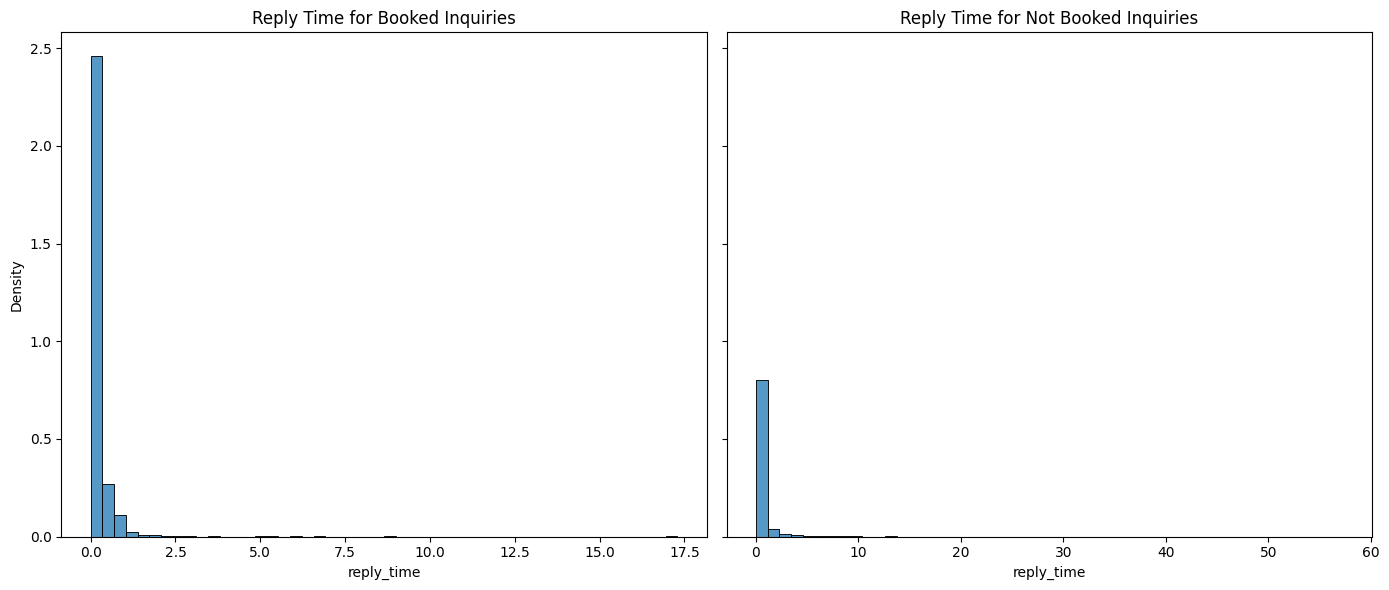

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(data=booked_inquiries, x='reply_time', bins=50, ax=ax[0], kde=False, stat="density")
ax[0].set_title('Reply Time for Booked Inquiries')

sns.histplot(data=not_booked_inquiries, x='reply_time', bins=50, ax=ax[1], kde=False, stat="density")
ax[1].set_title('Reply Time for Not Booked Inquiries')

plt.tight_layout()
plt.show()

### 4. Length of Time Booked Distribution in Successful vs. Unsuccessful Booking Inquiries

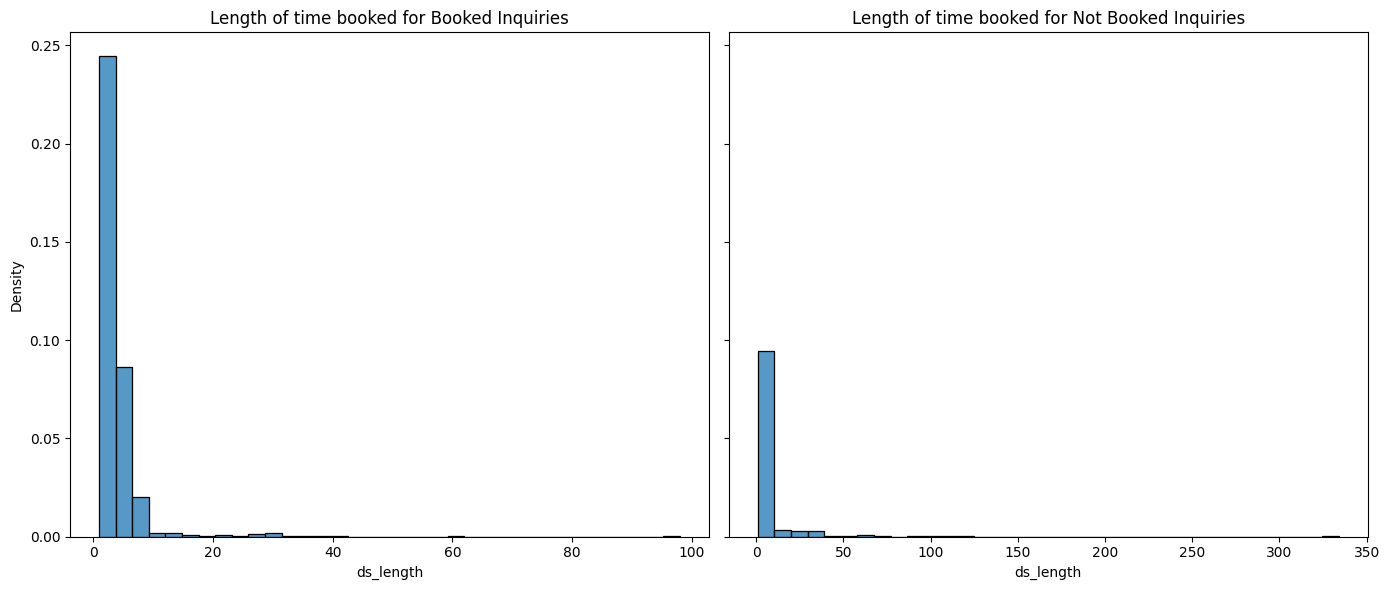

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(data=booked_inquiries, x='ds_length', bins=35, ax=ax[0], kde=False, stat="density")
ax[0].set_title('Length of time booked for Booked Inquiries')

sns.histplot(data=not_booked_inquiries, x='ds_length', bins=35, ax=ax[1], kde=False, stat="density")
ax[1].set_title('Length of time booked for Not Booked Inquiries')

plt.tight_layout()
plt.show()

### Heat Map of Searches by Country

In [ ]:
# Load continents data (specifically ISO-3 values) from continents2.csv file
continents_df = pd.read_csv('/work/continents2.csv')

# Counts the number of searches from each country
country_counts = searches['origin_country'].value_counts().reset_index()
country_counts.columns = ['ISO-2', 'count']

# Merge the search count data with the continents2.csv data based on matching ISO-2 values
merged_df = country_counts.merge(continents_df, how='left', left_on='ISO-2', right_on='alpha-2')

# Check for merge issues between unmatched data
unmatched = merged_df[merged_df['alpha-3'].isnull()]
if not unmatched.empty:
    print("Warning: There are unmatched ISO-2 codes.")
    display(unmatched)

# Choropleth map to visualize number of searches by country
fig = px.choropleth(
    merged_df,
    locations='alpha-3', 
    color='count',
    hover_name='name',
    color_continuous_scale='Reds',
    title='Number of Searches by Origin Country'
)

fig.update_geos(projection_type="natural earth")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Convert to DataFram to display better
most_common_search_countries = searches['origin_country'].value_counts()
most_common_df = pd.DataFrame(most_common_search_countries).reset_index()
most_common_df.columns = ['Country', 'Search Count']

styled_df = most_common_df.style.set_properties(**{
    'text-align': 'left',
    'background-color': '#f4f4f4',
    'color': 'black'
}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

# Display common countries
print("Most common countries searched from:")
display(styled_df)


,ISO-2,count,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
79,EU,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most common countries searched from:


,Country,Search Count
0,US,4009
1,IE,3744
2,GB,3309
3,FR,2534
4,IT,1625
5,DE,1481
6,ES,1235
7,CA,697
8,AU,621
9,NL,593


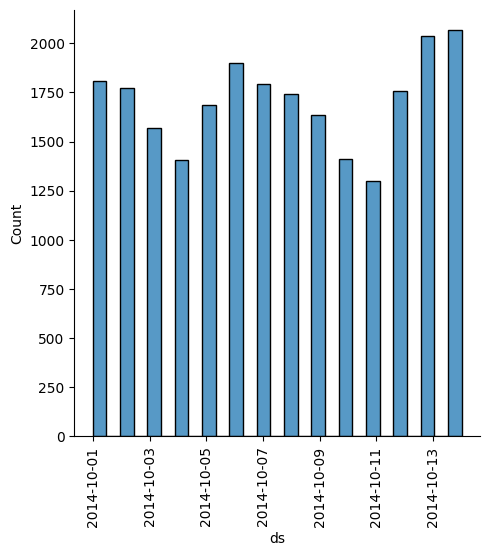

In [ ]:
# Graph of when people are searching for airbnbs in Dublin
ax = sns.displot(searches, x='ds')

for axis in ax.axes.flat:
    plt.setp(axis.get_xticklabels(), rotation=90)

plt.show()


### Time Series Plot: AirBNB Guests in Dublin

In [ ]:
# Cleaning
contacts['advance'] = (contacts['ds_checkin'] - contacts['ts_booking_at'].dt.normalize()).dt.days
contacts = contacts[contacts['advance'] >= 0]
contacts = contacts[contacts['ds_length'] <= 60]

In [ ]:
# Generate Table with Range of Dates in Data Frame
earliest_check_in = contacts['ds_checkin'].min()
latest_check_out = contacts['ds_checkout'].max()
date_range = pd.date_range(start=earliest_check_in, end=latest_check_out, freq='D')
population_table = pd.DataFrame({'date': date_range})
population_table

,date
0,2014-10-01
1,2014-10-02
2,2014-10-03
3,2014-10-04
4,2014-10-05
...,...
384,2015-10-20
385,2015-10-21
386,2015-10-22
387,2015-10-23


In [ ]:
# Count AirBNB Guests For Each Day
population = 0
population_column = []
for index,day in population_table.iterrows():
    for index, row in contacts.iterrows():
        if row['ds_checkin'] == day['date']:
                population += row['n_guests']
        if row['ds_checkout'] == day['date']:
                population -= row['n_guests']
    population_column.append(population)

population_table['population'] = population_column

In [ ]:
population_table

,date,population
0,2014-10-01,7
1,2014-10-02,34
2,2014-10-03,125
3,2014-10-04,165
4,2014-10-05,93
...,...,...
384,2015-10-20,0
385,2015-10-21,4
386,2015-10-22,4
387,2015-10-23,4


Major spikes in AirBnB guests in Dublin seem to center around Halloween in late October, a holiday that originated in Ireland, and Saint Patrick's Day in mid March, a holiday that was also originally celebrated in Ireland.

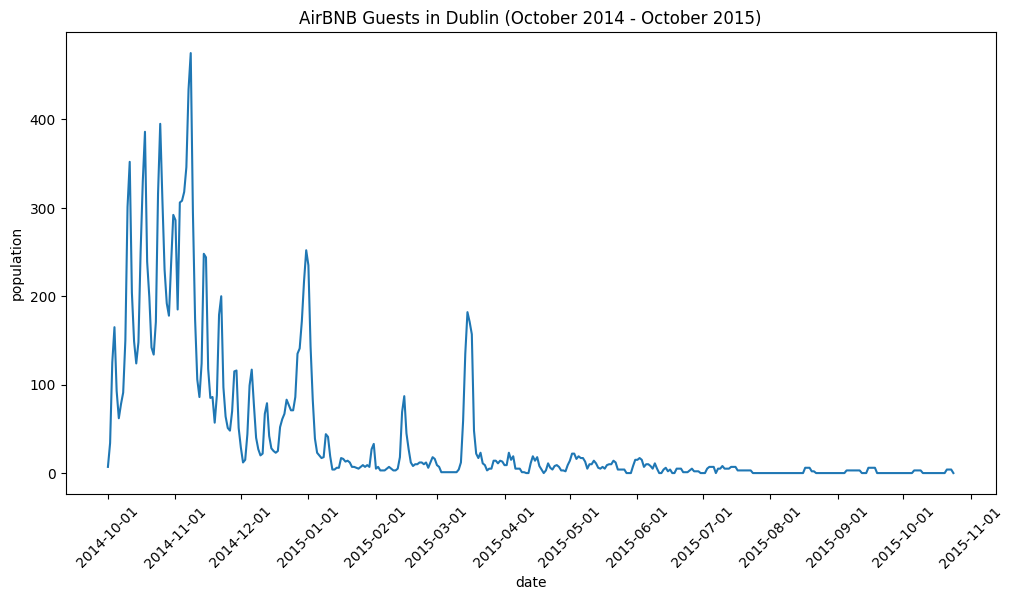

In [ ]:
# Plot Time Series Graph
plt.figure(figsize=(12, 6))
sns.lineplot(x = population_table['date'], y = population_table['population'], data = population_table)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)
plt.title("AirBNB Guests in Dublin (October 2014 - October 2015)")

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b437c3b3-3aa6-4b0e-b468-e8e7345d65e9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>